In [1]:
#As always, we import everything
import pandas as pd
import os
import re
import hdf5_getters as getters
import requests
from bs4 import BeautifulSoup
import numpy as np
from collections import OrderedDict
from tqdm import tqdm
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords as stop_words
from textblob import Word
import pycountry
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from gensim import corpora, models
import matplotlib.pyplot as plt
import json
import pickle
import lyricfetcher
import csv
import urllib
from urllib.request import urlopen, HTTPError
import langdetect
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

data_dir = './' + 'data'

In [2]:
year_artist_name_title_genre = pd.read_csv(os.path.join(data_dir + "/year_artist_name_title_genre.csv")).set_index('track_id')
final_dataframe = pd.read_csv("Final_With_Track_ID.csv")#.set_index('track_id')

In [3]:
import plotly
plotly.__version__
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.plotly as py
import plotly.graph_objs as go

# Table of content

1. [Introduction](#intro)

# 1. <a name="intro"></a>Introduction

Ever since the beginning of the 20th century, a number of political and social movements have arisen with the goal of empowering women and pushing for social equality of sexes. These movements serve as the foundation of modern day feminism. Numerous feminist ideologies have developed over the past half-century, and the topic certainly represents different viewpoints and aims which spark heated debates of both praises and criticism. Sexism on the other hand, is much less controversial and refers to any prejudice, stereotyping, or discrimination on the basis of sex, typically against women. 

Feminism empowers women, Sexism discriminates against women. The two seemingly opposing dynamics have been explored through various mediums by many aficionados. In this article, instead of approaching the topics from the conventional political, societal, or historical perspectives, we decided to look to music, particularly the lyrics of songs published over the last fifty years (or so) to seek insights. How were women depicted in the 1970s vs. 2000s? Are the images of women different for Rock vs. Rap music? Are there artists that are especially sexist or feminist? We hope to find the answers in the lyrics. 

The dataset we used for this project is the <a href="https://labrosa.ee.columbia.edu/millionsong/">Million Song Dataset</a> (MSD). However, we discovered that it only provides lyrics in tokenized format, and only includes the most frequently-occurring words. This is not ideal for analysis, and we decided to scrape the Internet for the full lyrics instead. We also looked to several playlists that are labelled as feminist-themed or sexist-themed by users, and used the songs as training data to create a Machine Learning model. The model is then applied to classify the songs in MSD as either Feminist, Sexist, or Neutral. We perform further analysis based on the classification and discuss the findings in thorough detail. 


# 2. What do you mean by Feminist / Sexist lyrics? 

Before we start calling songs feminist or sexist, a few things need to be clarified. First of all, what does it mean for lyrics to be sexist, feminist, or neutral? We shall define the meaning of these terms first. Second, what makes the lyrics of a song feminist or sexist? Lastly, how do we detect feminism or sexism in lyrics in order to classify it? We’ll address these questions in this section. 

Songs that are “explicitly” sexist are the most easily detectable. Explicit sexism is demonstrated by frequent usage of degrading terms towards women. This is commonly observed in Rap music. More subtle sexist songs however, are extremely hard to detect and can sometimes be confused with neutral songs. An example of this would be content such as objectification of women. Feminist lyrics are defined to include songs that portray women in a positive, loving, respectful, or empowering way. Neutral songs have lyrics that are neither sexist nor feminist. These songs either somehow depict women with neither positive nor negative connotation, or have nothing to do with women. 


To answer the second question, we decided to find songs that are labelled as feminist or sexist by internet users. We found such playlists and scraped internet for lyrics of these songs. For neutral lyrics, we looked to our own playlists to identify songs that fit the criteria, and scraped the lyrics for those songs. After converting lyrics from text to tf-idf feature vectors, we use scikit learn’s chi-square test to find the top 10 words that are the most correlated to each class. For feminist songs, it includes words like “worth”, “stronger”, “fix”, “respect” and “woman”. For sexist songs, unsurprisingly the list consists of degrading terms. Neutral songs show words that relate to other topics. We will perform the same test to all the songs in MSD we classify using the Machine Learning model we create, and expect to get similar results. 

In [4]:
pd.DataFrame({'Feminist':['girls','boys','woman','respect','mess','river','fix','uh','stronger','worth'],
             'Sexist':['dick','nigga','pussy','bitch','f*ck','ass','butt','body','baby','bitches'],
            'Neutral':['em','remember','dah','singing','lord','wanna','bitch','girls','girl','river']})


# girls
#        . woman
#        . boys
#        . uh
#        . cause
#        . say
#        . ladies
#        . respect
#        . mess
#        . girl
# . remember
#        . river
#        . dah
#        . child
#        . lord
#        . singing
#        . blue
#        . jammin
#        . somebody
#        . soul
# baby
#        . bitch
#        . girl
#        . body
#        . wanna
#        . butt
#        . pussy
#        . night
#        . dick
#        . ass


,Feminist,Sexist,Neutral
0,girls,dick,em
1,boys,nigga,remember
2,woman,pussy,dah
3,respect,bitch,singing
4,mess,f*ck,lord
5,river,ass,wanna
6,fix,butt,bitch
7,uh,body,girls
8,stronger,baby,girl
9,worth,bitches,river


 Everyone has their own interpretation of feminist or sexist lyrics. To avoid inherent bias that all humans possess, we have decided to let machine do the classification. With four machine learning models that are most commonly used for multi-class classification, we fit the training data to each model and use cross validation to compute the accuracies. The results are shown below, and LinearSVC() model clearly has more superior performance compared to the other three. The confusion matrix for this model is also displayed below. Note that the model generally performs well with the exception that it tends to confuse sexist songs with neutral songs. As mentioned earlier, some sexist lyrics are more subtle and may require a representation more complicated than tf-idf vectorization. We proceed to classification using the LinearSVC() model to complete the dataset we will perform analysis on. It contains 50991 songs, and for each song, in addition to its classification as either feminist, sexist or neutral, it also has the year, genre, artist, and title information.  

![title](accuracy_comp.png)
![title](conf_mat.png)

# Songs Between 1970s and 2000s

The Landscape of music industry between the 1970s and 2000s is ... Talented artists emerge in all genres of music and many songs are still well-loved by today's audience. Rock was a dominating genre during this time period. As shown below, close to 50% of all songs are Rock songs. 

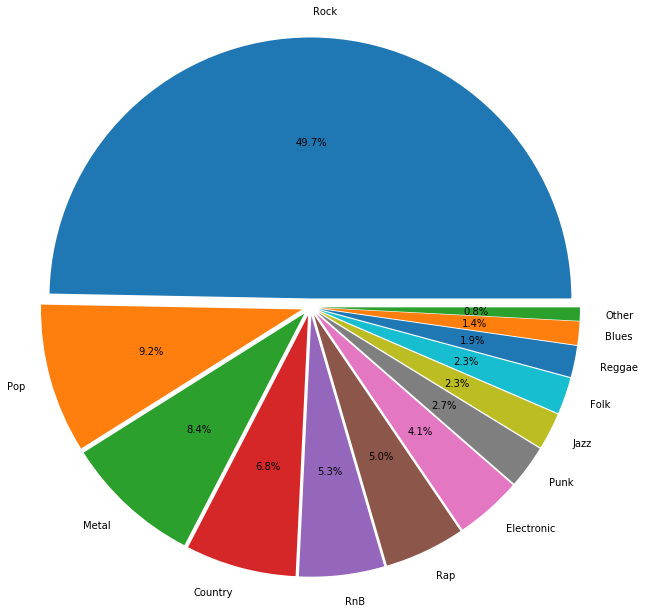

In [67]:
plot = plt.pie(final_dataframe['GenreGroup'].value_counts(), labels = final_dataframe['GenreGroup'].value_counts().index.tolist(), autopct='%1.1f%%', explode= [0.1]*len(final_dataframe['GenreGroup'].value_counts()), radius = 3)



This may be due to the fast growth of rock music during the 1990s and 2000s. Rock, Electronic, and Pop are the most popular music during the 2000s, followed by metal and Rap. The year 2000 is 

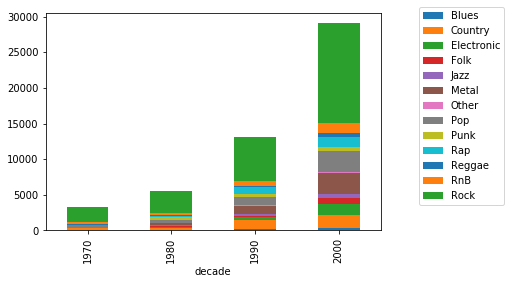

In [70]:
plot_decade_genre = final_dataframe.groupby(['decade', 'GenreGroup']).size().unstack().plot(kind='bar', stacked = True)
plot_decade_genre.legend(bbox_to_anchor=(1.1, 1.05) )


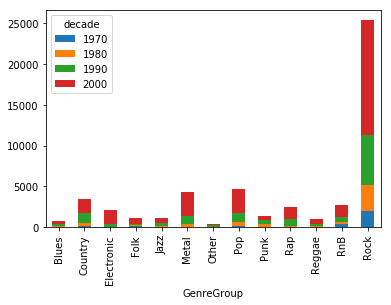

In [71]:
final_dataframe.groupby(['GenreGroup', 'decade']).size().unstack().plot(kind='bar', stacked = True)

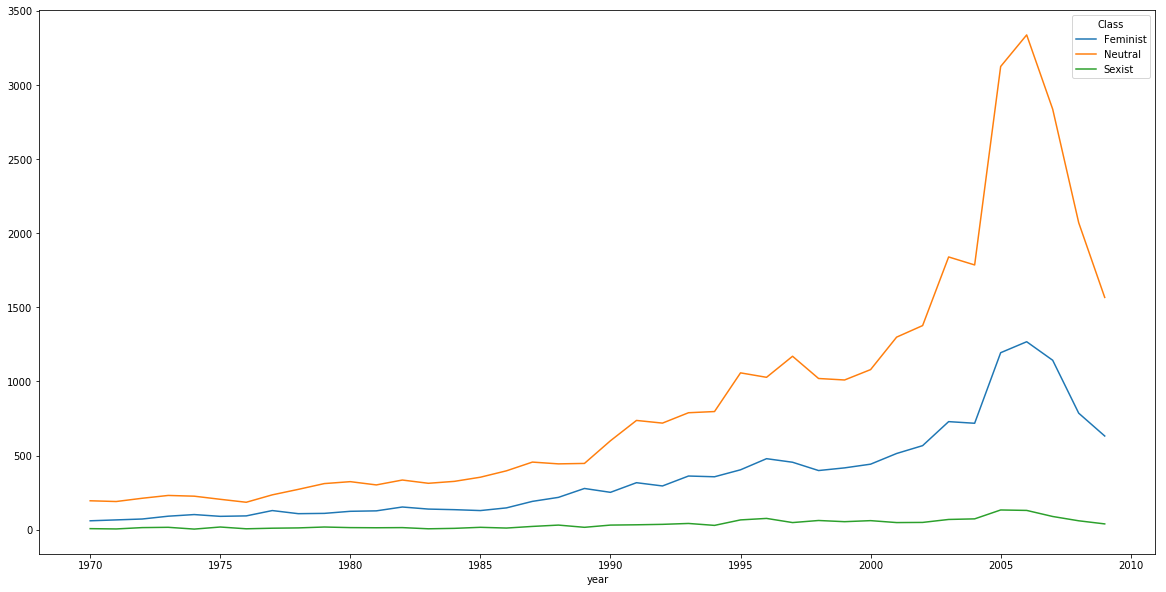

In [64]:
# increase size
count_through_year = final_dataframe.groupby(['year','Class']).size().unstack().plot(figsize = (20,10))
count_through_year


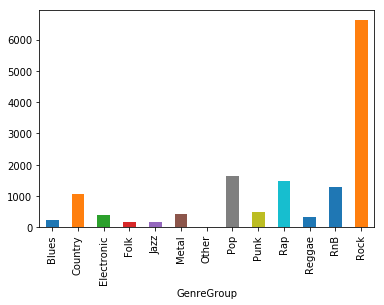

In [50]:
fem_count_per_genre = final_dataframe.loc[final_dataframe['Class'] == 'Feminist'].groupby(['GenreGroup']).size()#.plot()
fem = fem_count_per_genre.plot(kind = 'bar')

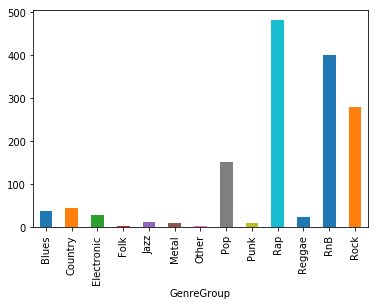

In [51]:
sexist_count_per_genre = final_dataframe.loc[final_dataframe['Class'] == 'Sexist'].groupby(['GenreGroup']).size()#.plot()
sexist = sexist_count_per_genre.plot(kind = 'bar')

Look at the four with the highest numbers Rap, Pop, RnB, Rock

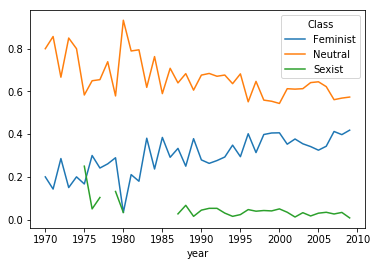

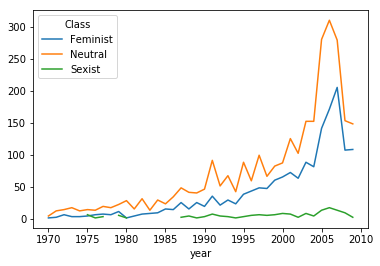

In [55]:
# Pop music: proportion of feminist, sexist and neutral songs over years 
Pop_count = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Pop'].groupby(['year','Class']).size()#.unstack().plot()

Pop1 = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Pop'].groupby('year', as_index=False)['Class'].size()

Pop_proportion = Pop_count / Pop1
Pop_proportion.unstack().plot()

Pop_count.unstack().plot()


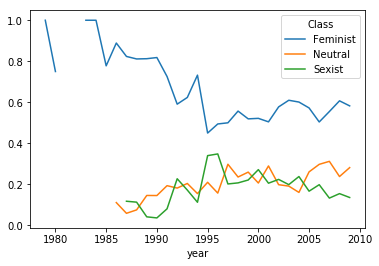

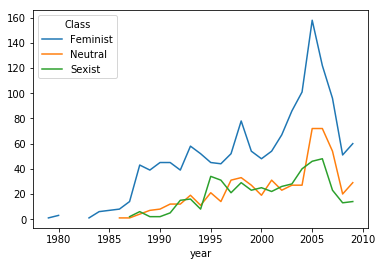

In [56]:
# Rap music: proportion of feminist, sexist and neutral songs over years 
Rap_count = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Rap'].groupby(['year','Class']).size()#.unstack().plot()

Rap1 = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Rap'].groupby('year', as_index=False)['Class'].size()

Rap_proportion = Rap_count / Rap1
Rap_proportion.unstack().plot()

Rap_count.unstack().plot()

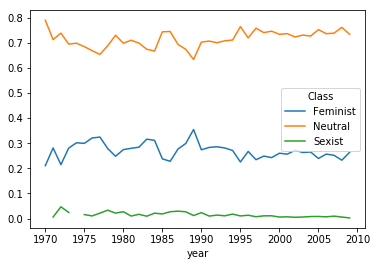

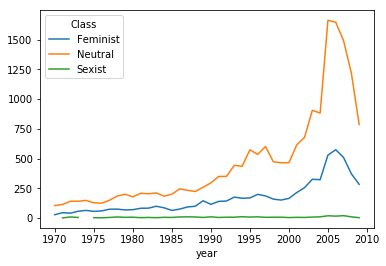

In [53]:
# ROck music: proportion of feminist, sexist and neutral songs over years 
Rock_count = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Rock'].groupby(['year','Class']).size()#.unstack().plot()

Rock1 = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Rock'].groupby('year', as_index=False)['Class'].size()

Rock_proportion = Rock_count / Rock1
Rock_proportion.unstack().plot()

Rock_count.unstack().plot()


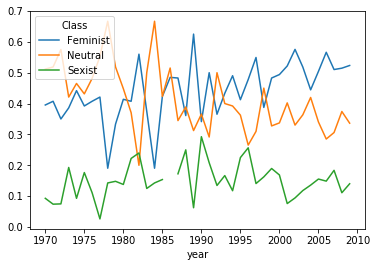

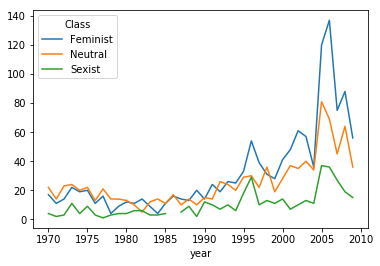

In [57]:
# RnB music: proportion of feminist, sexist and neutral songs over years 
RnB_count = final_dataframe.loc[final_dataframe['GenreGroup'] == 'RnB'].groupby(['year','Class']).size()#.unstack().plot()

RnB1 = final_dataframe.loc[final_dataframe['GenreGroup'] == 'RnB'].groupby('year', as_index=False)['Class'].size()

RnB_proportion = RnB_count / RnB1
RnB_proportion.unstack().plot()

RnB_count.unstack().plot()

In [ ]:
# high variability due to the low number of songs in this genre

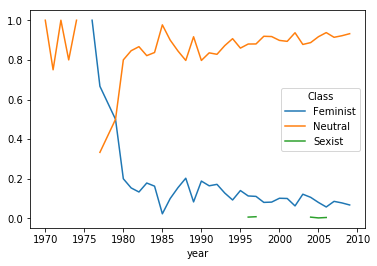

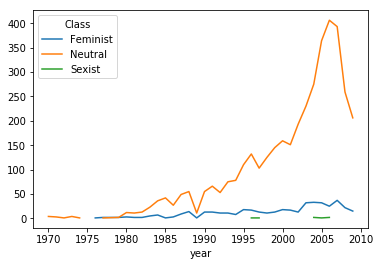

In [58]:
# Metal music: proportion of feminist, sexist and neutral songs over years 
Metal_count = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Metal'].groupby(['year','Class']).size()#.unstack().plot()

Metal1 = final_dataframe.loc[final_dataframe['GenreGroup'] == 'Metal'].groupby('year', as_index=False)['Class'].size()

Metal_proportion = Metal_count / Metal1
Metal_proportion.unstack().plot()

Metal_count.unstack().plot()

# Just for fun... Battle of Feminism vs. Sexism 

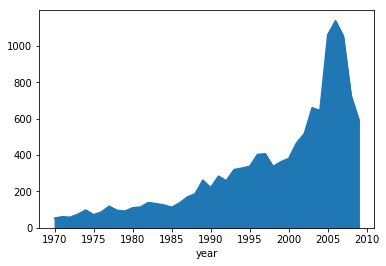

In [62]:
battle = final_dataframe.groupby(['year', 'labels']).size()
#print(a) #eg. in 1970, 7 sexist songs, 195 neutral, 60 feminist => overall score (sum) 53

battle_per_year = final_dataframe.groupby(['year'])['labels'].sum().plot(kind = "Area")

# What could be improved?

So many things...

In [63]:
# Ends here

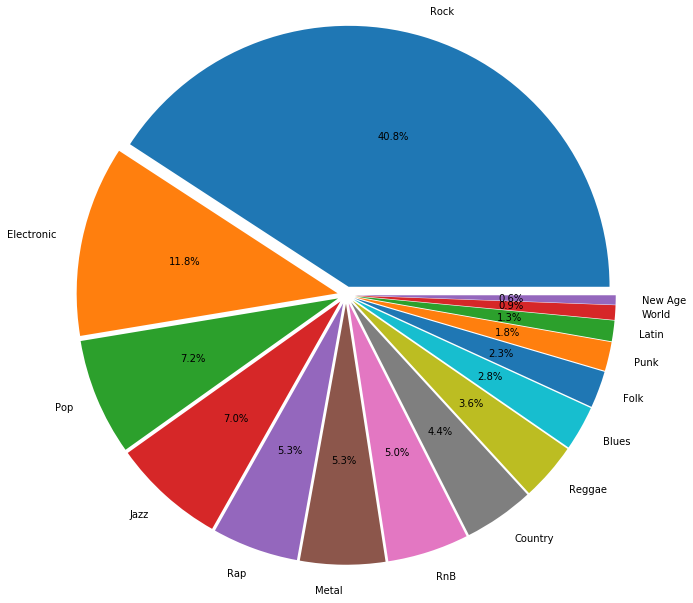

In [10]:
plot = plt.pie(year_artist_name_title_genre['genre'].value_counts(), labels = year_artist_name_title_genre['genre'].value_counts().index.tolist(), autopct='%1.1f%%', explode= [0.1]*len(year_artist_name_title_genre['genre'].value_counts()), radius = 3)